In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
plt.ion()

/home/sonali/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


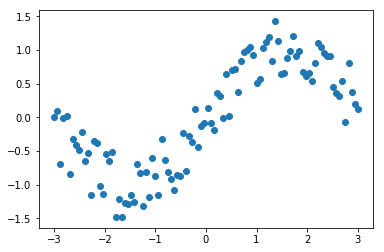

In [3]:
n_observations=100
fig, ax= plt.subplots(1,1)
xs=np.linspace(-3,3,n_observations)
ys=np.sin(xs)+np.random.uniform(-0.5,0.5,n_observations)
ax.scatter(xs,ys)
fig.show()
plt.draw()

In [4]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)


In [5]:
W=tf.Variable(tf.random_normal([1]),name='weight')
B=tf.Variable(tf.random_normal([1]),name='bias')
Y_pred=tf.add(tf.multiply(X,W),B)

In [6]:
cost=tf.reduce_sum(tf.pow(Y_pred-Y,2))/(n_observations-1)

In [7]:
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [8]:
n_epochs=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_training_cost=0.0
    for epochi in range(n_epochs):
        for (x,y) in zip(xs,ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        training_cost=sess.run(cost, feed_dict={X: xs, Y: ys})
        print(training_cost)
        if epochi%20==0:
            ax.plot(xs,Y_pred.eval(feed_dict={X: xs},session=sess), 'k', alpha=epochi/n_epochs)
            fig.show()
            plt.draw()
                
        if np.abs(training_cost-prev_training_cost)<0.001:
            break
        prev_training_cost=training_cost
fig.show()
plt.draw()
            

1.6500361
1.5039973
1.3744138
1.2593927
1.1572601
1.0665371
0.9859151
0.9142376
0.85048133
0.79374176
0.74321884
0.69820505
0.658074
0.6222723
0.5903099
0.56175345
0.5362193
0.51336795
0.49289897
0.4745464
0.45807454
0.44327497
0.42996317
0.41797525
0.40716642
0.39740822
0.38858676
0.38060102
0.37336162
0.3667888
0.36081237
0.35536975
0.3504052
0.3458694
0.34171858
0.33791363
0.33441982
0.33120623
0.32824534
0.3255127
0.32298648
0.32064712
0.31847715
0.31646103
0.31458476
0.31283596
0.31120348
0.30967724
0.3082483
0.30690855
0.3056507
0.3044683
0.30335534
0.3023065
0.30131698


<Figure size 432x288 with 0 Axes>

In [9]:
fig.show()
plt.draw()

<Figure size 432x288 with 0 Axes>

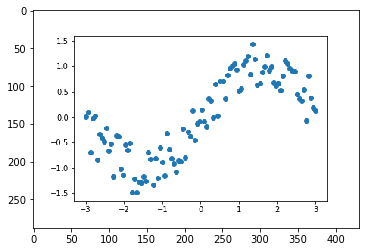

In [10]:
fig.savefig('/home/sonali/img2.png')
import matplotlib.image as imgmp
img1=imgmp.imread('/home/sonali/img2.png')
plt.imshow(img1)